<a href="https://colab.research.google.com/github/jcarvaj18643/CarEvaluation/blob/main/calidad_de_carros_segunda_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calidad de Carros

Titulo: Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil

Nombres : Jaime Andres Carvajal Gutierrez

Descripcion:


El conjunto de datos de evaluación de coches de la Universidad de California, Irvine, es una base de datos estructurada que evalúa automóviles utilizando un modelo de decisión jerárquico simple, diseñado originalmente para demostrar un sistema experto para la toma de decisiones llamado DEX. Esta base fue creada por Marko Bohanec y V. Rajkovic y es utilizada para probar métodos de inducción constructiva y descubrimiento de estructuras.

In [1]:
import pandas as pd
import seaborn as sns


In [4]:
dfAutos = pd.read_csv('/content/car.csv')

print(dfAutos.head())
print(dfAutos.describe(include='all'))
print(dfAutos.info())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 

Ahora en una celda de código cargue la base car.data determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información

In [5]:
# Determining the number of variables and records
num_records = dfAutos.shape[0]
num_variables = dfAutos.shape[1]

# Variable types: As provided, all are categorical and none are explicitly numerical
variable_types = dfAutos.dtypes

# Generate a summary of the dataset
summary = {
    'Number of Records': num_records,
    'Number of Variables': num_variables,
    'Variable Types \n': variable_types
}

print(summary)

{'Number of Records': 1728, 'Number of Variables': 7, 'Variable Types \n': buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object}


In [6]:
 # Display the first few rows of the dataframe and the distribution of the target variable 'class'
data_head = dfAutos.head()
class_distribution = dfAutos['class'].value_counts(normalize=True)

print(data_head)
print(class_distribution)

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64


In [7]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = dfAutos.drop('class', axis=1)
y = dfAutos['class']

# Convertir variables categóricas usando get_dummies (KNN funciona mejor con variables numéricas)
X = pd.get_dummies(X)

# Escalar las características (importante para KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (1382, 21)
Tamaño del conjunto de prueba: (346, 21)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Supongamos que tus datos ya están escalados y divididos, usando X_scaled, y_train, etc.
# Prueba con diferentes números de vecinos
neighbors = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Results for {n} Neighbors:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)  # Separador para resultados


Results for 3 Neighbors:
Confusion Matrix:
 [[ 40   4  39   0]
 [  2   4   4   1]
 [ 10   3 222   0]
 [  4   9   3   1]]
Classification Report:
               precision    recall  f1-score   support

         acc       0.71      0.48      0.58        83
        good       0.20      0.36      0.26        11
       unacc       0.83      0.94      0.88       235
       vgood       0.50      0.06      0.11        17

    accuracy                           0.77       346
   macro avg       0.56      0.46      0.46       346
weighted avg       0.76      0.77      0.75       346

------------------------------------------------------------
Results for 4 Neighbors:
Confusion Matrix:
 [[ 50   9  24   0]
 [  1   5   4   1]
 [ 30   4 201   0]
 [  4   7   4   2]]
Classification Report:
               precision    recall  f1-score   support

         acc       0.59      0.60      0.60        83
        good       0.20      0.45      0.28        11
       unacc       0.86      0.86      0.86       2

In [9]:
from imblearn.over_sampling import SMOTE

numeroVecinos = 13

X = pd.get_dummies(dfAutos.drop('class', axis=1))
y = dfAutos['class']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para sobremuestrear las clases minoritarias
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo KNN con 10 vecinos
knn = KNeighborsClassifier(n_neighbors=numeroVecinos)
knn.fit(X_train_resampled, y_train_resampled)

# Evaluar el modelo
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 59  10   0   8]
 [  0  13   0   1]
 [ 33  17 177  15]
 [  1   3   0   9]]


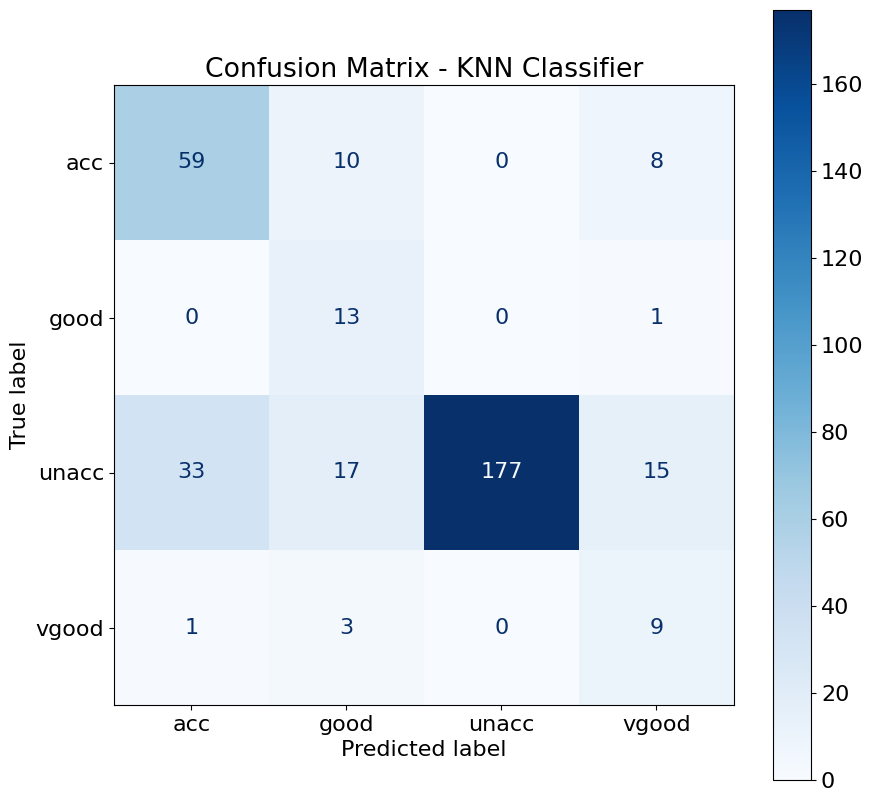

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Configuración de tamaño de fuente para una mejor visualización
plt.rcParams.update({'font.size': 16})

# Creación de la figura para la visualización
fig, axes = plt.subplots(figsize=(10, 10))

# Generación y visualización de la matriz de confusión utilizando el modelo KNN
disp = ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    y_test,
    display_labels=knn.classes_,
    cmap=plt.cm.Blues,
    ax=axes
)
disp.ax_.set_title('Confusion Matrix - KNN Classifier')

# Mostrar la gráfica
plt.show()

In [11]:
from sklearn.metrics import classification_report

target_names = ['acceptable', 'good', 'unacceptable', 'very good']

print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

  acceptable       0.63      0.77      0.69        77
        good       0.30      0.93      0.46        14
unacceptable       1.00      0.73      0.84       242
   very good       0.27      0.69      0.39        13

    accuracy                           0.75       346
   macro avg       0.55      0.78      0.60       346
weighted avg       0.86      0.75      0.78       346



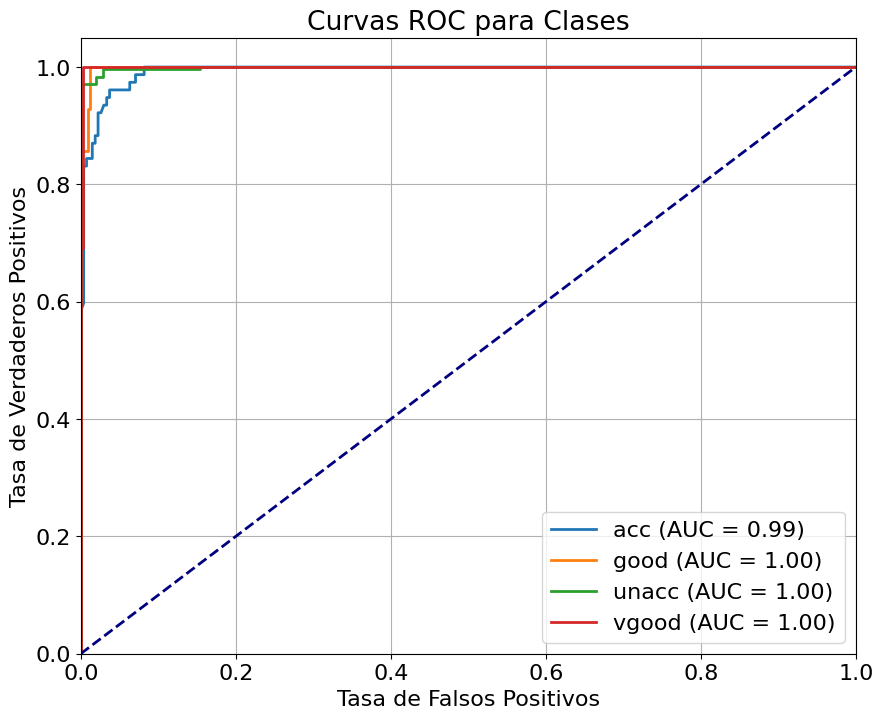

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que X_train, y_train, X_test, y_test ya están definidos y preparados
modeloRF_binario = OneVsRestClassifier(RandomForestClassifier(random_state=42))
modeloRF_binario.fit(X_train, y_train)

# Predicción de probabilidades
y_pred_proba = modeloRF_binario.predict_proba(X_test)

# Inicializa el gráfico
plt.figure(figsize=(10, 8))

# Asumimos que y_test es una serie de etiquetas, convertirlo para ROC si necesario
if isinstance(y_test, pd.Series):
    from sklearn.preprocessing import label_binarize
    clases = modeloRF_binario.classes_
    y_test_bin = label_binarize(y_test, classes=clases)

    for i, clase in enumerate(clases):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{clase} (AUC = {roc_auc:.2f})')
else:
    for i, clase in enumerate(y_test.columns):
        fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{clase} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para Clases')
plt.legend(loc="lower right")
plt.grid()
plt.show()

